## 🌟 Problem Statement
To perform object detection using transfer learning from a pre-trained CNN model. The task includes loading a pre-trained backbone, freezing initial layers, adding a custom classifier head, training on a dataset, and fine-tuning the network.

## ✦ Description of the Problem
Transfer learning allows using powerful CNNs trained on large datasets (like ImageNet) for custom tasks with limited data. This assignment focuses on understanding how pre-trained networks extract features, how to add trainable layers on top, and how to fine-tune deeper layers for improved accuracy.

## ✦ Program Details
- Load pre-trained CNN backbone (e.g., VGG16, ResNet50, MobileNet) <br>
- Freeze early convolutional layers<br>
- Add custom classifier layers<br>
- Train classifier<br>
- Unfreeze deeper layers selectively<br>
- Evaluate object detection performance<br>

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Pre processing img data 

In [25]:
dataset_dir = r"/Users/mel/Desktop/caltech-dataset"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


#### Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

In [27]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


#### a. Load in a pre-trained CNN model trained on a large dataset

In [29]:
# Load VGG16 without top layers
weights_path = r"/Users/mel/Desktop/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

2025-11-16 15:40:57.786727: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-16 15:40:57.786963: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-16 15:40:57.787504: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-16 15:40:57.787552: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-16 15:40:57.787605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [31]:
for layer in base_model.layers:
   layer.trainable = False

#### c. Add custom classifier with several layers of trainable parameters to model

In [33]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### d. Train classifier layers on training data available for task

In [35]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2025-11-16 15:40:58.756152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-11-16 15:40:58.760256: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.1410 - loss: 4.3053 - val_accuracy: 0.3095 - val_loss: 3.4028
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.3366 - loss: 3.1909 - val_accuracy: 0.3795 - val_loss: 2.9173
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.4455 - loss: 2.5875 - val_accuracy: 0.4400 - val_loss: 2.5560
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.5409 - loss: 2.1080 - val_accuracy: 0.4840 - val_loss: 2.3228
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.6132 - loss: 1.7982 - val_accuracy: 0.5450 - val_loss: 2.1031
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.6724 - loss: 1.5333 - val_accuracy: 0.5490 - val_loss: 1.9956
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.7326 - loss: 1.2667 - val_accuracy: 0.5620 - val_loss: 1.9110
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.7930 - loss: 1.0705 - val_accuracy: 0.5615 - val_

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [37]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2025-11-16 15:42:07.959445: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.2685 - loss: 3.6689 - val_accuracy: 0.4625 - val_loss: 2.4634
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - accuracy: 0.5036 - loss: 2.0738 - val_accuracy: 0.5485 - val_loss: 1.9322
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.6892 - loss: 1.2214 - val_accuracy: 0.5845 - val_loss: 1.7487
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - accuracy: 0.7797 - loss: 0.8157 - val_accuracy: 0.6095 - val_loss: 1.6225
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.8725 - loss: 0.4685 - val_accuracy: 0.6200 - val_loss: 1.6445
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.9244 - loss: 0.2826 - val_accuracy: 0.6280 - val_loss: 1.6985
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - accuracy: 0.9482 - loss: 0.1903 - val_accuracy: 0.6160 - val_loss: 1.7568
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.9635 - loss: 0.1378 - val_accuracy: 0.6395 - val_

In [38]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

 1/63 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step

2025-11-16 15:43:24.347126: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


In [39]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  Motorbikes
Actual:  Motorbikes


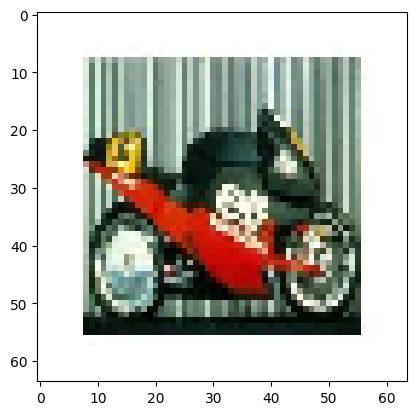

In [40]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])